In [21]:
%matplotlib inline
from azureml import Workspace
import pandas as pd
import numpy as np

ws = Workspace()
ds = ws.datasets['Breast_Cancer.csv']
breast_cancer = ds.to_dataframe()
breast_cancer.columns = ['Id', 'Outcome', 'Time', 'Radius_Mean', 'Texture_Mean', 'Perimeter_Mean', 'Area_Mean', 'Smoothness_Mean',
                       'Compactness_Mean', 'Concavity_Mean', 'Concave Points_Mean', 'Symmetry_Mean', 'Fractional Dimension_Mean',
                        'Radius_SE', 'Texture_SE', 'Perimeter_SE', 'Area_SE', 'Smoothness_SE', 'Compactness_SE', 'Concavity_SE',
                        'Concave Points_SE', 'Symmetry_SE', 'Fractional Dimension_SE', 'Radius_Worst', 'Texture_Worst', 
                        'Perimeter_Worst', 'Area_Worst', 'Smoothness_Worst', 'Compactness_Worst', 'Concavity_Worst', 
                         'Concave Points_Worst', 'Symmetry_Worst', 'Fractional Dimension_Worst', 'Tumor size', 'Lymph node status']

#breast_cancer.iloc[:,-1] = breast_cancer.iloc[:,-1].apply(pd.to_numeric, args=('coerce',))
breast_cancer['Lymph node status'] = breast_cancer['Lymph node status'].apply(pd.to_numeric, args=('coerce',))
#breast_cancer.dtypes
breast_cancer.dropna(axis = 0, inplace = 'True')
#breast_cancer.drop(breast_cancer.columns[0], axis = 1, inplace = 'True')
breast_cancer.drop('Id', axis = 1, inplace = 'True')
breast_cancer['Outcome'].replace('N', 0, inplace = 'True')
breast_cancer['Outcome'].replace('R', 1, inplace = 'True')
breast_cancer


,Outcome,Time,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave Points_Mean,...,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave Points_Worst,Symmetry_Worst,Fractional Dimension_Worst,Tumor size,Lymph node status
0,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,139.70,1436.0,0.11950,0.19260,0.31400,0.11700,0.2677,0.08113,5.0,5.0
1,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,3.0,2.0
2,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,159.10,1949.0,0.11880,0.34490,0.34140,0.20320,0.4334,0.09067,2.5,0.0
3,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,2.0,0.0
4,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,3.5,0.0
5,1,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,...,107.30,733.2,0.17060,0.41960,0.59990,0.17090,0.3485,0.11790,2.5,0.0
7,1,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,4.0,10.0
8,0,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,2.0,1.0
9,0,76,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,6.0,20.0
10,0,123,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,2.0,0.0


## Pair Plot

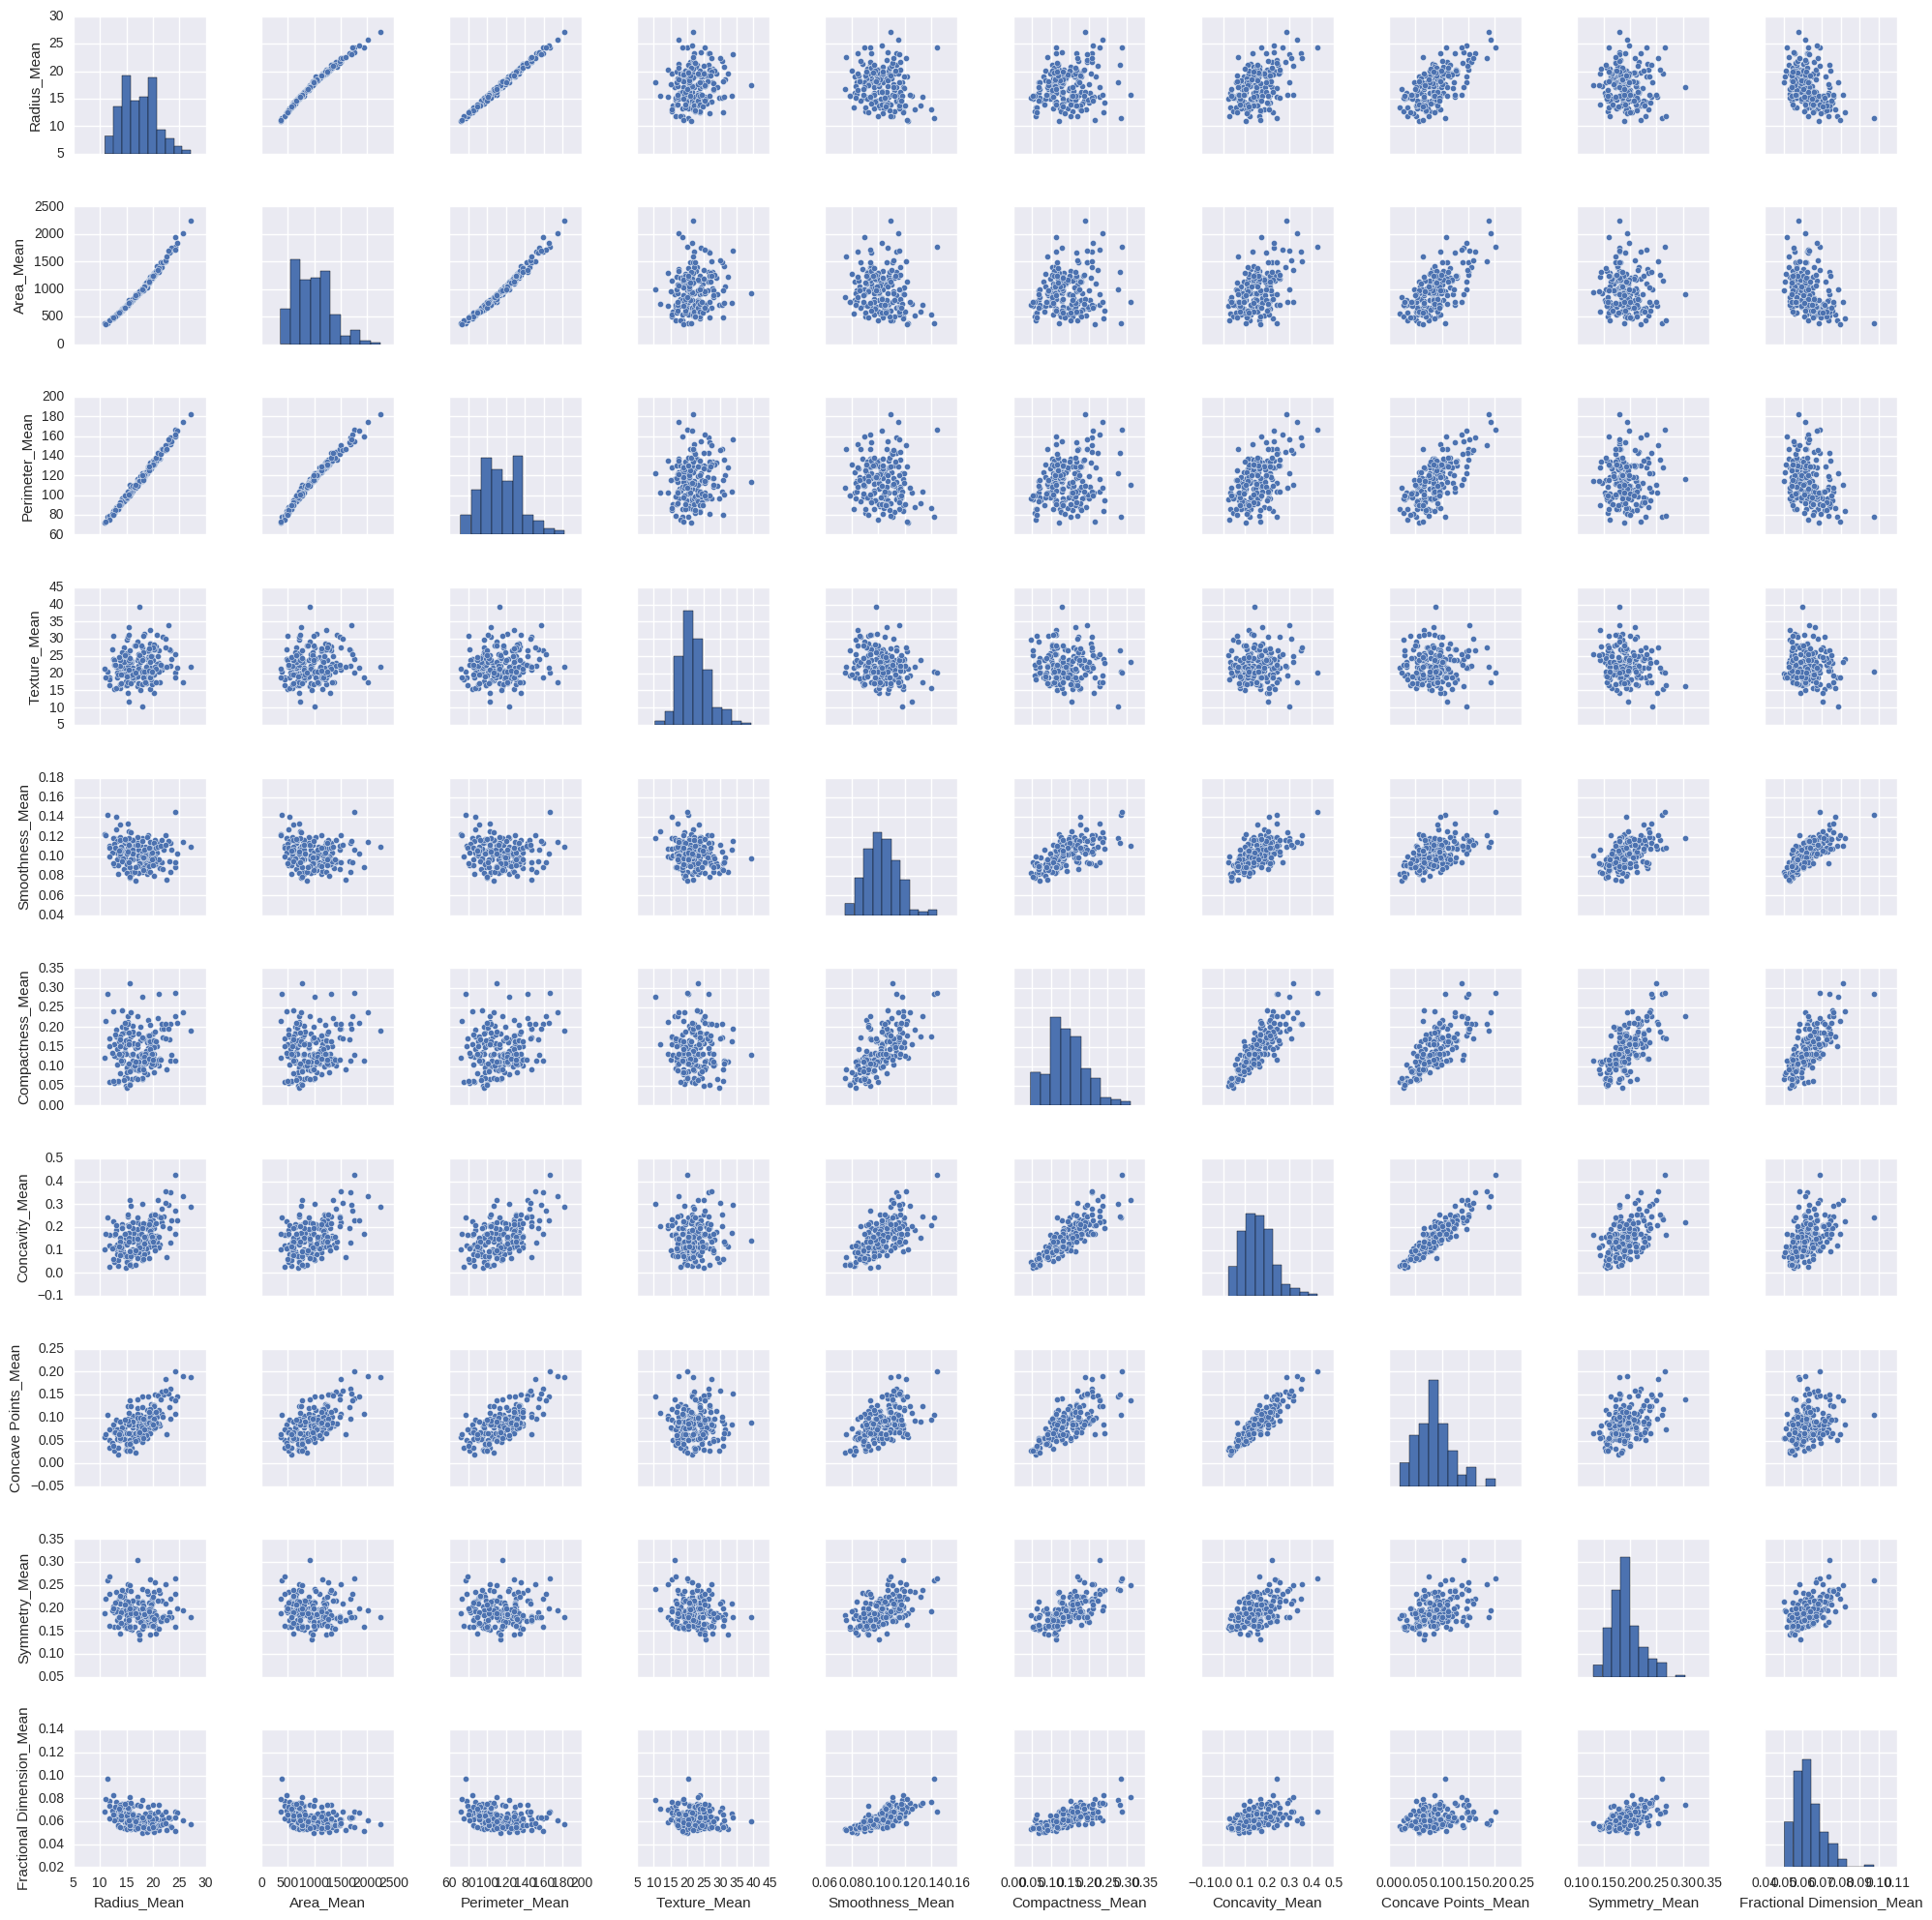

In [28]:
import seaborn as sns
#pair_cols = [3, 4, 5, 6, 7, 8]
pair_cols = ['Radius_Mean', 'Area_Mean', 'Perimeter_Mean', 'Texture_Mean', 'Smoothness_Mean', 'Compactness_Mean', 'Concavity_Mean',
            'Concave Points_Mean', 'Symmetry_Mean', 'Fractional Dimension_Mean']
sns.pairplot(breast_cancer[pair_cols], size = 2)

## Histogram

'Outcome'

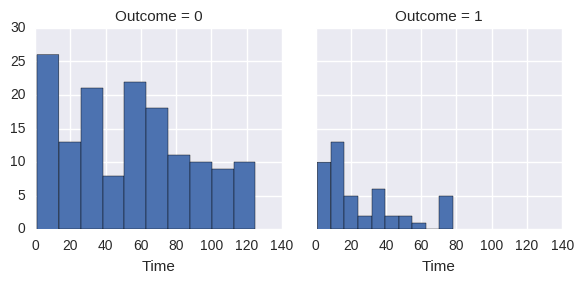

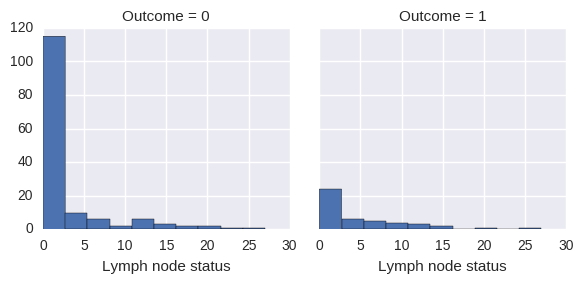

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
#hist_cols = [3, 4, 5, 6, 7, 8]
hist_cols = ['Time', 'Lymph node status']
def cond_hists(df, plot_cols, grid_col):
    for col in hist_cols:
        grid = sns.FacetGrid(df, col = grid_col)
        grid.map(plt.hist, col, alpha = 1.0)
    return grid_col

cond_hists(breast_cancer, hist_cols, breast_cancer.columns[0])

#plt.hist(breast_cancer.iloc[:, 2])



## Box Plot

'Outcome'

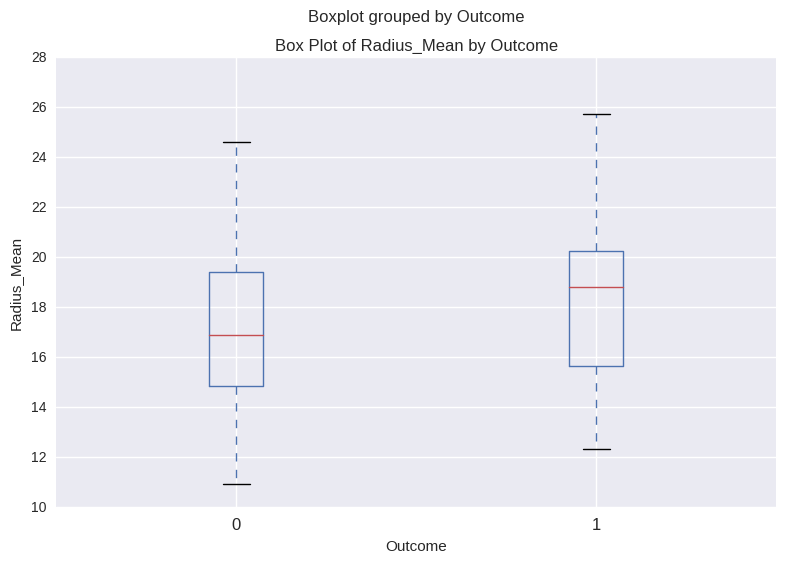

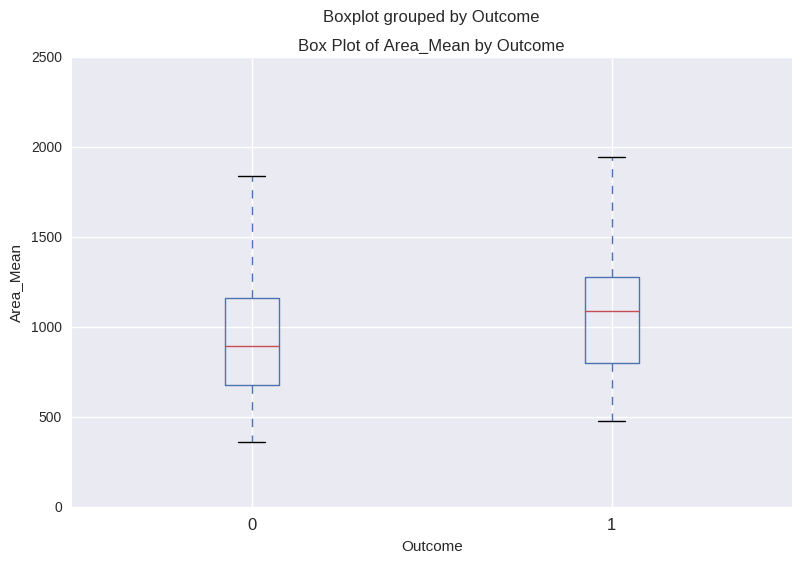

In [30]:
#breast_cancer.iloc[:,0] = breast_cancer.iloc[:,0].apply(pd.to_numeric, args=('coerce',))
#breast_cancer.iloc[:,0] = breast_cancer.iloc[:,0].astype(str)
#breast_cancer.iloc[:,0] = breast_cancer.iloc[:,0] + ','
#breast_cancer

import matplotlib.pyplot as plt
box_cols = ['Radius_Mean', 'Area_Mean']

def cond_box(df, plot_cols, by):
    for col in plot_cols:
        fig = plt.figure(figsize = (9,6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box Plot of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by

cond_box(breast_cancer, box_cols, 'Outcome')
#cond_box(breast_cancer, box_cols, breast_cancer.columns[0])
#breast_cancer.dtypes
#breast_cancer
#breast_cancer.columns[0]
#len(breast_cancer.columns[0])


## Scatter Plot

['Area_Mean', 'Perimeter_Mean', 'Concavity_Mean', 'Concave Points_Mean']

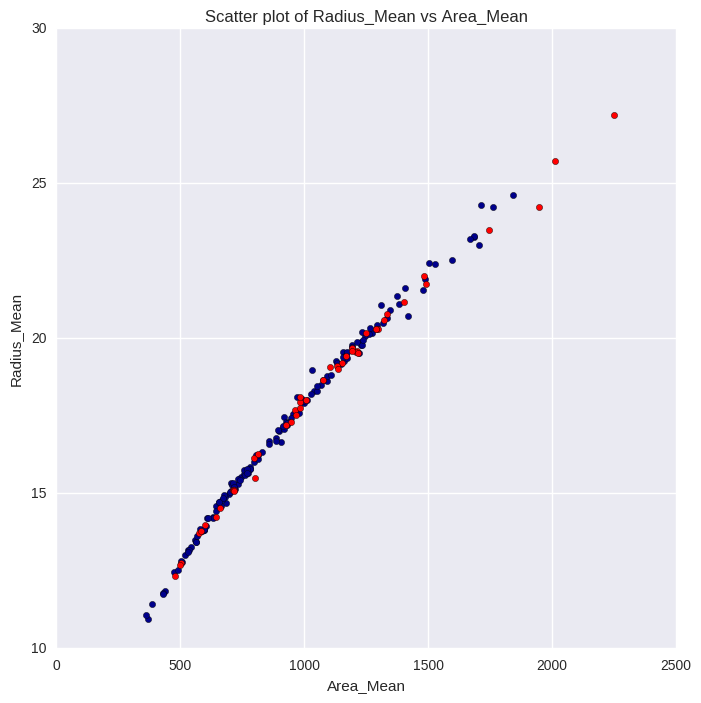

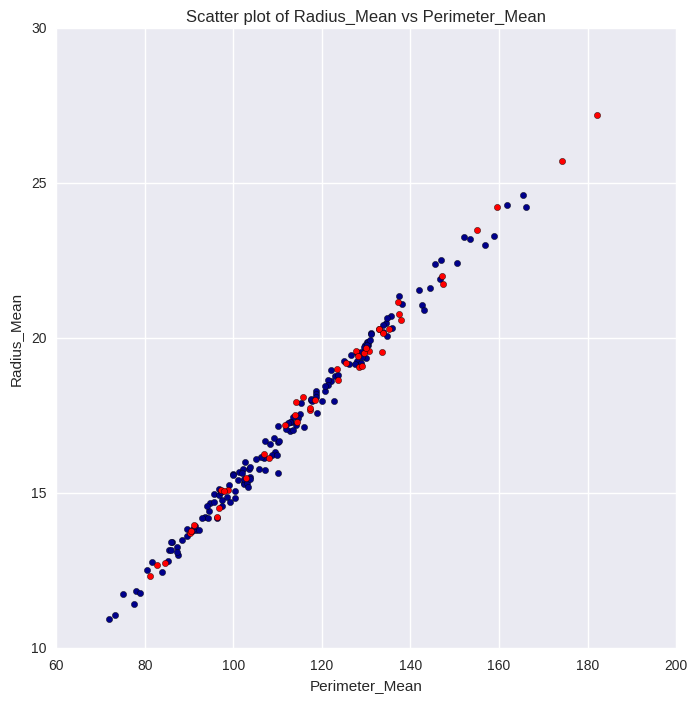

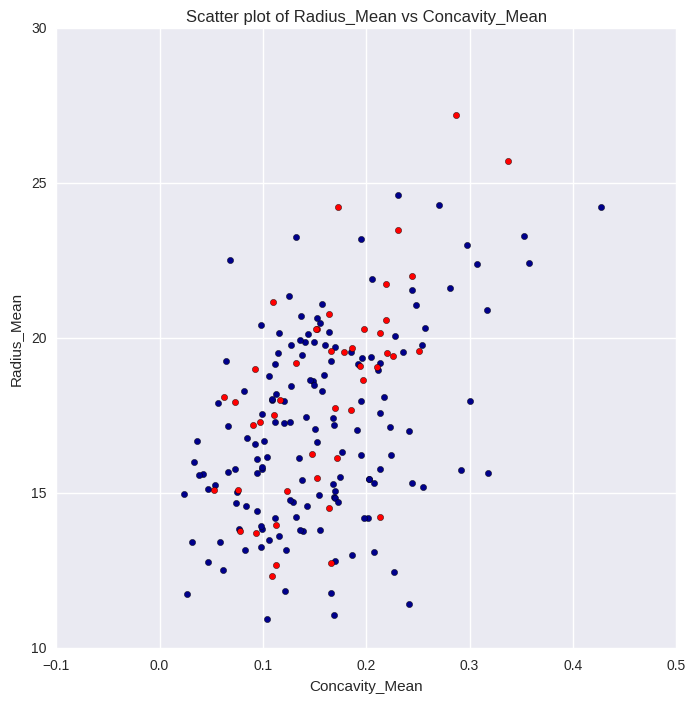

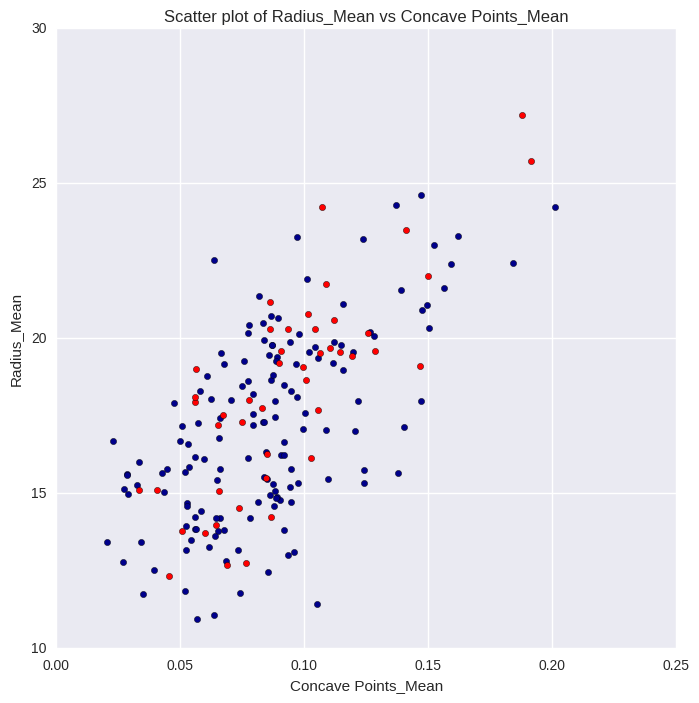

In [34]:
#scatter_cols = ["AG", "AH"]
scatter_cols = ['Area_Mean', 'Perimeter_Mean', 'Concavity_Mean', 'Concave Points_Mean']

def auto_scatter(df, plot_cols):
    for col in plot_cols:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.gca()
        #temp1 = df.ix[df.iloc[:,0] == 'N']
        #temp2 = df.ix[df.iloc[:,0] == 'R']
        temp1 = df.loc[df['Outcome'] == 0]
        temp2 = df.loc[df['Outcome'] == 1]
        if temp1.shape[0] > 0:
            temp1.plot(kind = 'scatter', x = col, y = 'Radius_Mean', 
                      ax = ax, color = 'DarkBlue')
        if temp2.shape[0] > 0:
            temp2.plot(kind = 'scatter', x = col, y = 'Radius_Mean', 
                       ax = ax, color = 'Red')
            
        ax.set_title('Scatter plot of Radius_Mean vs ' + col)
    return plot_cols
        
                       
auto_scatter(breast_cancer, scatter_cols)
